In [ ]:
import cv2
import IPython.display

from pupil_labs.camera import Camera
from pupil_labs.camera.assets import chessboard_image

camera = Camera(
    pixel_width=1600,
    pixel_height=1200,
    camera_matrix=[
        [891.61897098, 0.0, 816.30726443],
        [0.0, 890.94104777, 614.49661859],
        [0.0, 0.0, 1.0],
    ],
    distortion_coefficients=[
        -0.13057592,
        0.10888688,
        0.00038934,
        -0.00046976,
        -0.00072779,
        0.17010936,
        0.05234352,
        0.02383326,
    ],
)


def imshow(img):
    _, ret = cv2.imencode(".jpg", img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

Distorted Image


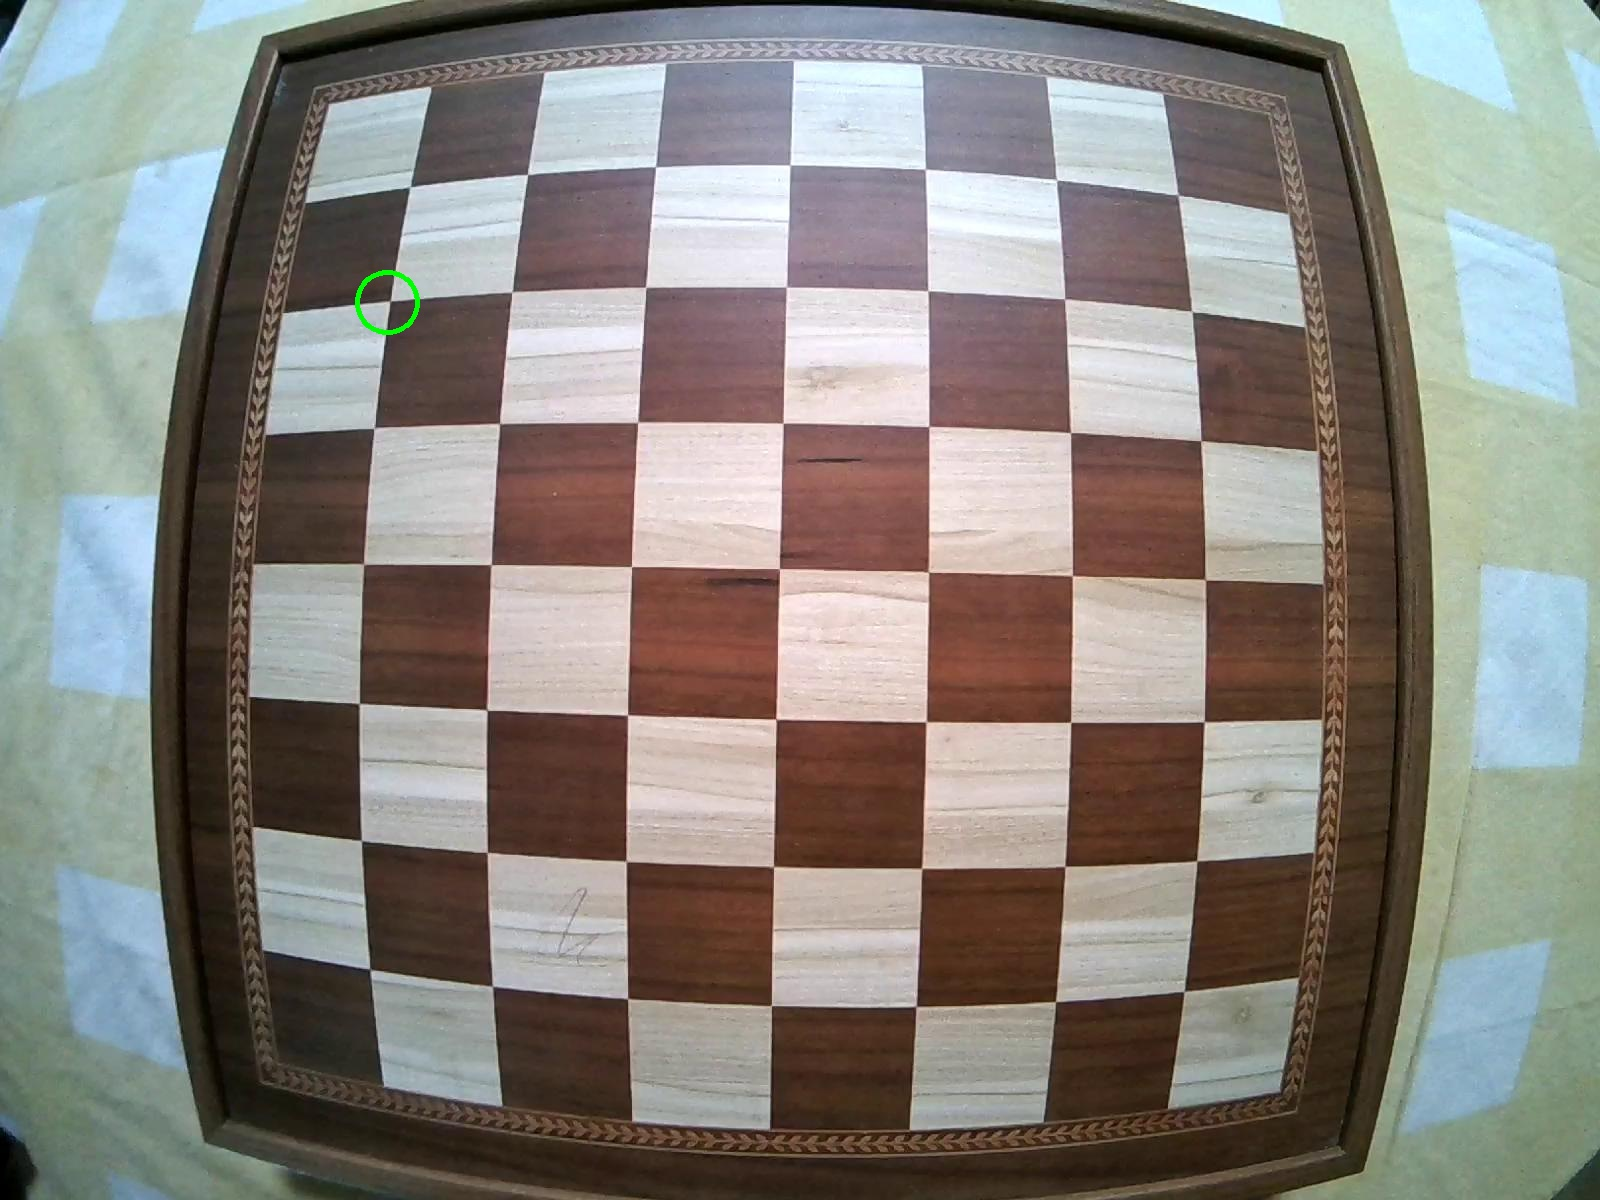

In [3]:
distorted_image = chessboard_image.copy()
distorted_points = (387, 302)
cv2.circle(distorted_image, distorted_points, 30, (0, 255, 0), 4)

print("Distorted Image")
imshow(distorted_image)

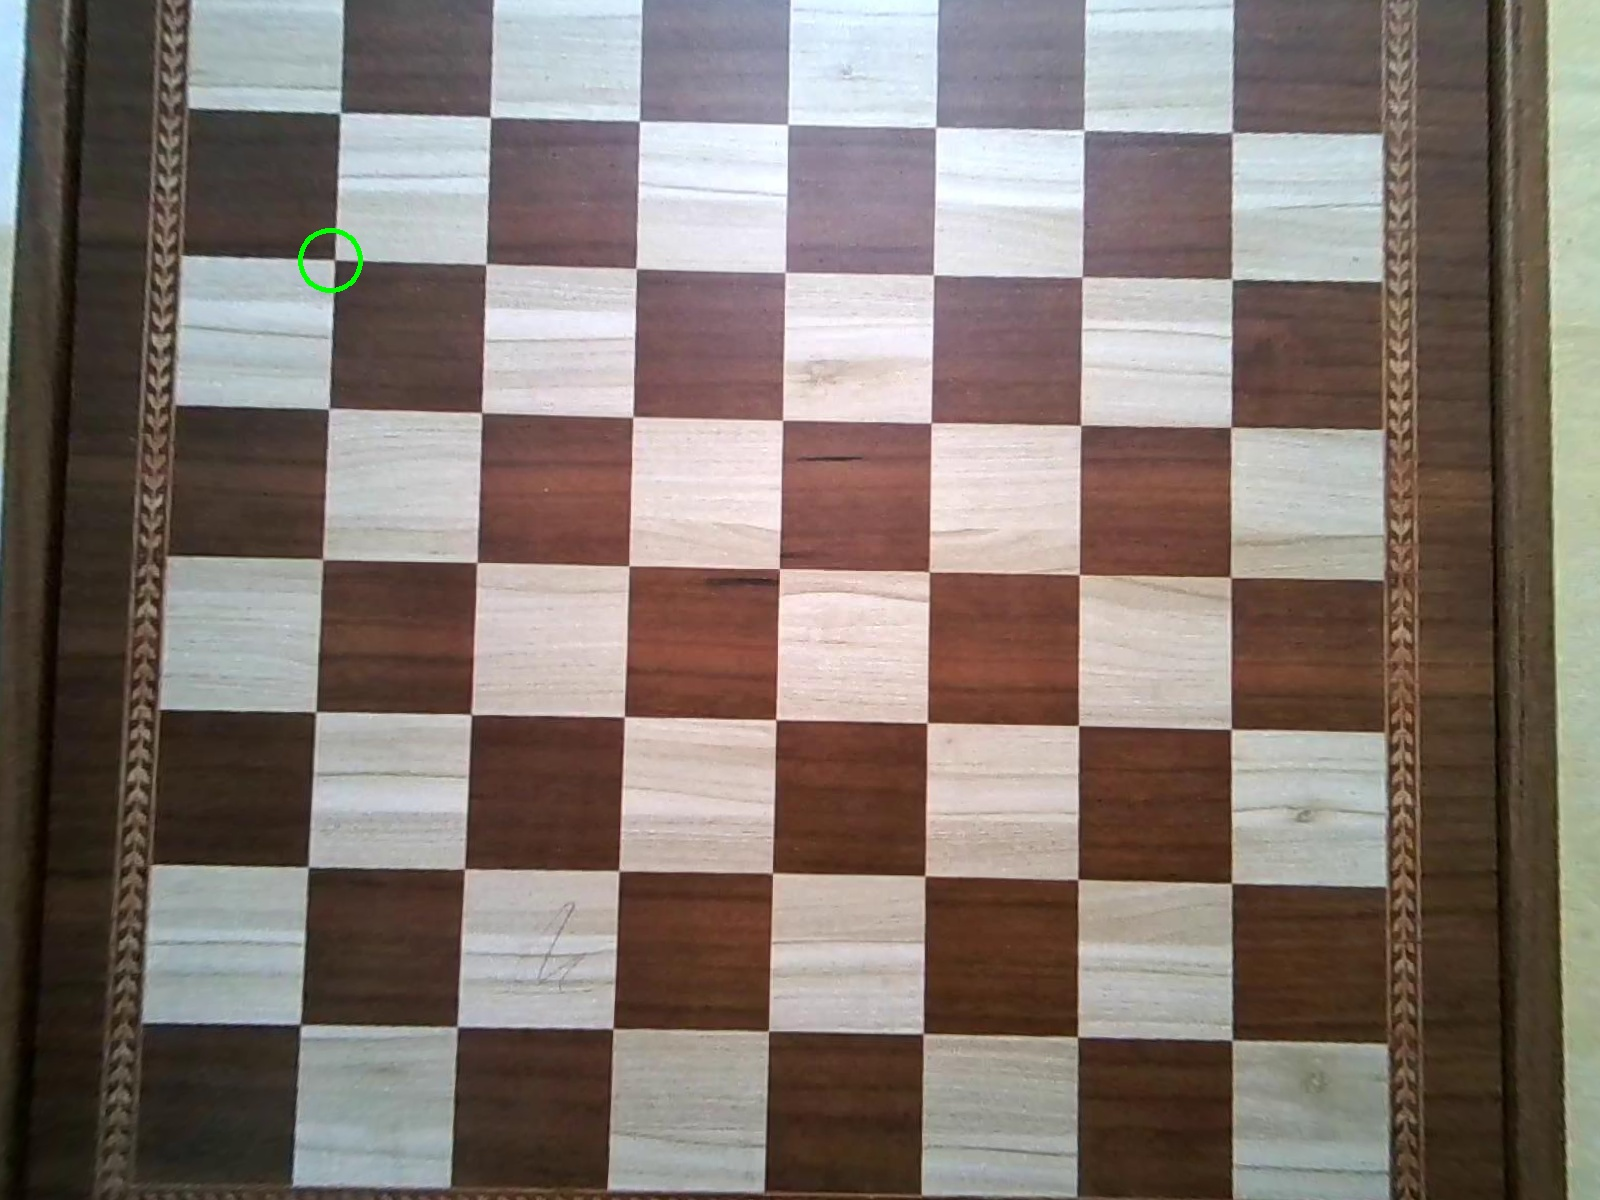

In [4]:
undistorted_image = camera.undistort_image(chessboard_image)
undistorted_points = camera.undistort_points(distorted_points)
cv2.circle(undistorted_image, tuple(undistorted_points.astype(int)), 30, (0, 255, 0), 4)
imshow(undistorted_image)

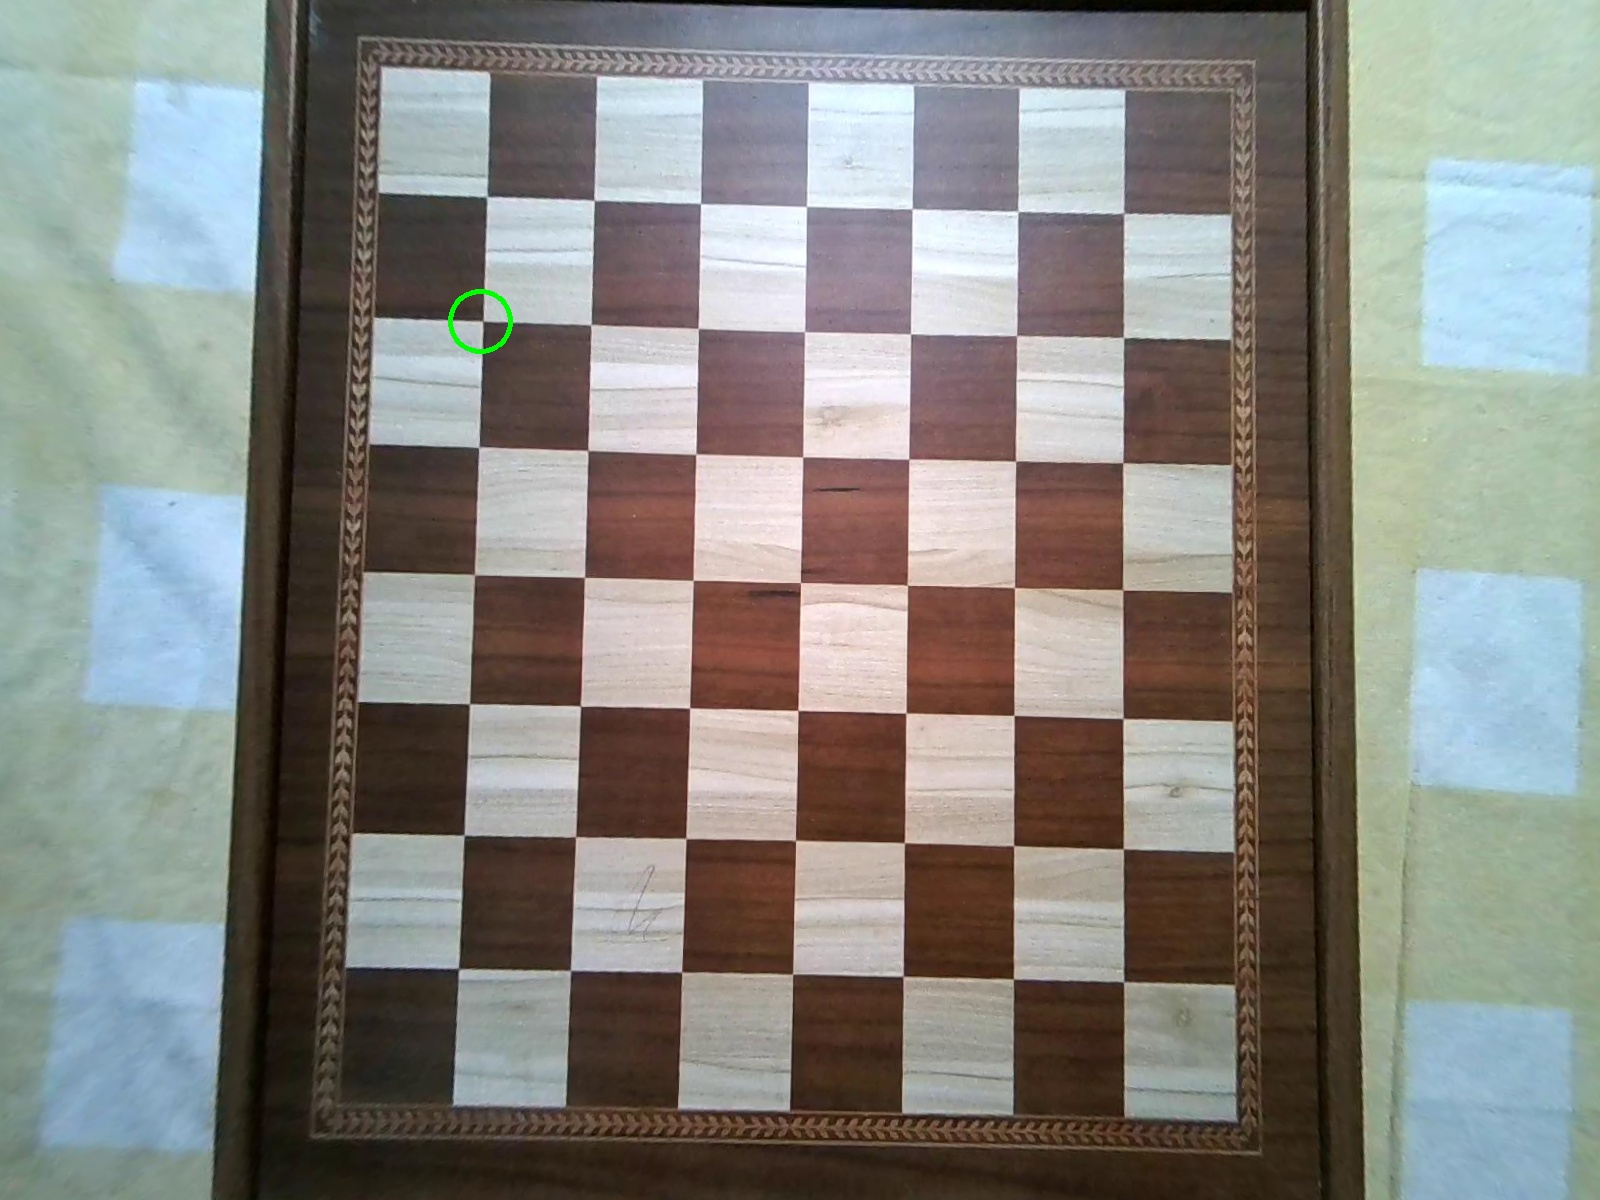

In [5]:
undistorted_optimal_image = camera.undistort_image(
    chessboard_image, use_optimal_camera_matrix=True
)
undistorted_optimal_points = camera.undistort_points(
    distorted_points, use_optimal_camera_matrix=True
)
cv2.circle(
    undistorted_optimal_image,
    tuple(undistorted_optimal_points.astype(int)),
    30,
    (0, 255, 0),
    4,
)
imshow(undistorted_optimal_image)